# K-Means Clustering based on Jaccard Distance Sample

## Import
Import **pandas** and **matplotlib**.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import KMeans
np.random.seed(212)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Synthetic Dataset
Sample dataset.

In [51]:
sample_df = pd.read_csv('sample.csv')

Show the contents of the `DataFrame` which contains the set of 300 randomly generated points.

In [52]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Feature1  50 non-null     object
 1   Feature2  50 non-null     object
 2   Feature3  50 non-null     object
 3   Feature4  50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


Display dataset info using the [`info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function.

In [53]:
kmeans = KMeans(3, 50, sample_df)

This uses the `jaccard_distance()` function. This function returns the Jaccard distance between 2 data points `P` and `Q` which describe two sets. 

$$D(P, Q)= 1 - \frac{|P \cap Q|}{|P \cup Q|} $$

We optimize this through the principle of inclusion-exclusion for finnite sets. Where: 
$${|P \cup Q|} = {|P|+|Q|-|P \cap Q|} $$

Because we know that each set will be limited to 6 members only (6 Pokémon), we can simplify further.

$${|P \cup Q|} = {12-|P \cap Q|} $$

This yields the final formula: $$D(P, Q)= 1 - \frac{|P \cap Q|}{12-|P \cap Q|} $$

This function has 2 parameters - `point1` and `point2`. Where `point1` and `point2` can be:
- a `Set` and a `Set` - this returns the Jaccard distance as a `np.float64`.
- a `Series` and a `Set` - this returns a `Series` of Jaccard distances of a single data point and a `Series` of sets.

In [54]:
showdown_df = pd.read_csv('showdown.csv')
pokemon_df = showdown_df.loc[:, ['Pokemon 1','Pokemon 2','Pokemon 3','Pokemon 4','Pokemon 5','Pokemon 6']]
pokemon_df

,Pokemon 1,Pokemon 2,Pokemon 3,Pokemon 4,Pokemon 5,Pokemon 6
0,Infernape,Breloom,Tyranitar,Jellicent,Bronzong,Reuniclus
1,Tyranitar,Alakazam,Latios,Ferrothorn,Landorus-Therian,Excadrill
2,Tyranitar,Amoonguss,Starmie,Alakazam,Heatran,Skarmory
3,Tyranitar,Stoutland,Forretress,Salamence,Gliscor,Breloom
4,Tornadus,Politoed,Tentacruel,Dugtrio,Ferrothorn,Jirachi
...,...,...,...,...,...,...
1785,Politoed,Amoonguss,Excadrill,Thundurus-Therian,Keldeo,Ferrothorn
1786,Politoed,Gyarados,Jolteon,Ferrothorn,Haxorus,Umbreon
1787,Scizor,Togekiss,Hippowdon,Infernape,Terrakion,Sableye
1788,Tyranitar,Garchomp,Heatran,Conkeldurr,Forretress,Jellicent


Iteration 1
Iteration 2
Done clustering!
Iteration 1
Iteration 2
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Done clustering!


[{'Garchomp',
  'Jirachi',
  'Kyurem-Black',
  'Landorus-Therian',
  'Latios',
  'Magnezone'},
 {'Garchomp', 'Heatran', 'Jellicent', 'Reuniclus', 'Skarmory', 'Tyranitar'},
 {'Breloom', 'Dragonite', 'Garchomp', 'Scizor', 'Starmie', 'Volcarona'},
 {'Excadrill', 'Infernape', 'Latios', 'Ninetales', 'Victini', 'Xatu'},
 {'Ferrothorn',
  'Keldeo',
  'Latios',
  'Politoed',
  'Tentacruel',
  'Thundurus-Therian'},
 {'Gyarados', 'Haxorus', 'Lucario', 'Mamoswine', 'Mew', 'Uxie'},
 {'Forretress', 'Heatran', 'Latias', 'Roserade', 'Spiritomb', 'Vaporeon'},
 {'Crobat', 'Hitmontop', 'Nidoqueen', 'Umbreon', 'Venusaur', 'Weavile'},
 {'Abomasnow', 'Blissey', 'Forretress', 'Gliscor', 'Latios', 'Reuniclus'},
 {'Alakazam',
  'Ferrothorn',
  'Landorus-Therian',
  'Latios',
  'Rotom-Wash',
  'Tyranitar'}]

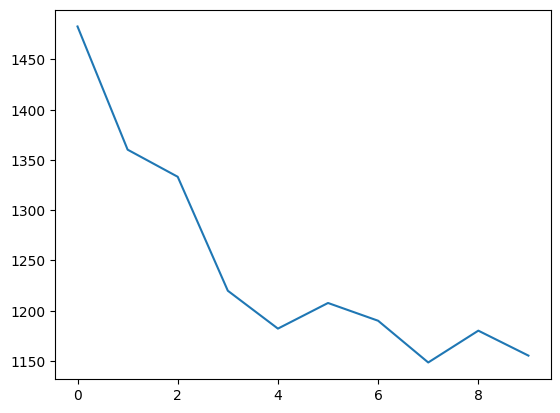

In [55]:
WCSS = []
for x in range(10):
    kmeans_pkmn = KMeans(x + 1, 1790, pokemon_df)
    groups = kmeans_pkmn.train(pokemon_df, 200)
    WCSS.append(kmeans_pkmn.WCSS(pokemon_df, groups))
pd.Series(WCSS).plot(kind='line')

kmeans_pkmn.centroids

In [56]:
kmeans_pkmn = KMeans(8, 1790, pokemon_df)
grps = kmeans_pkmn.train(pokemon_df, 300)
kmeans_pkmn.WCSS(pokemon_df, grps)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Done clustering!


1179.1216450216477

In [57]:
filtered_dataset = pokemon_df[kmeans_pkmn.group_observations() == 0]
filtered_dataset

,Pokemon 1,Pokemon 2,Pokemon 3,Pokemon 4,Pokemon 5,Pokemon 6
1,Tyranitar,Alakazam,Latios,Ferrothorn,Landorus-Therian,Excadrill
10,Hippowdon,Ferrothorn,Jellicent,Latios,Garchomp,Scizor
14,Hippowdon,Ferrothorn,Jellicent,Latios,Garchomp,Scizor
17,Ninetales,Milotic,Togekiss,Zoroark,Garchomp,Glaceon
24,Breloom,Latios,Terrakion,Tyranitar,Keldeo,Scizor
...,...,...,...,...,...,...
1776,Togekiss,Latios,Jirachi,Infernape,Cloyster,Blissey
1778,Breloom,Politoed,Feraligatr,Tornadus,Excadrill,Jirachi
1780,Garchomp,Latias,Scizor,Rotom-Wash,Tyranitar,Keldeo
1783,Excadrill,Amoonguss,Heatran,Latios,Breloom,Weavile


In [58]:
kmeans_pkmn.centroids

[{'Garchomp',
  'Jirachi',
  'Landorus-Therian',
  'Latios',
  'Rotom-Wash',
  'Tyranitar'},
 {'Alakazam',
  'Heatran',
  'Landorus-Therian',
  'Rotom-Wash',
  'Skarmory',
  'Tyranitar'},
 {'Breloom', 'Dragonite', 'Garchomp', 'Scizor', 'Starmie', 'Volcarona'},
 {'Ferrothorn',
  'Keldeo',
  'Latios',
  'Politoed',
  'Tentacruel',
  'Thundurus-Therian'},
 {'Gyarados', 'Haxorus', 'Lucario', 'Mamoswine', 'Mew', 'Uxie'},
 {'Blissey', 'Forretress', 'Gliscor', 'Jellicent', 'Tyranitar', 'Xatu'},
 {'Arcanine', 'Flygon', 'Hitmontop', 'Omastar', 'Tentacruel', 'Zapdos'},
 {'Dragonite', 'Garchomp', 'Jirachi', 'Kyurem-Black', 'Latios', 'Magnezone'}]